In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
dataset= pd.read_csv("D:\IIT B\Sem 3\GNR 627\Course Project\Data Set\Final_Dataset_Used_Bikes.csv")

In [40]:
df= pd.DataFrame(dataset)
df

,bike_name,price,city,kms_driven,owner,age,power,brand,sales_success
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,1
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,0
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph,0
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,0
...,...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4,100,Hero,1
32644,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9,180,TVS,1
32645,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6,220,Bajaj,1
32646,Hero Super Splendor 125cc,15600,Jaipur,84186,First Owner,16,125,Hero,0


In [41]:
#One hot encoding Owner variable

one_hot_encoded = pd.get_dummies(df['owner'])
df = pd.concat([df, one_hot_encoded], axis=1)

df.drop('owner', axis=1, inplace=True) 

In [42]:
#One hot encoding Owner variable

one_hot_encoded = pd.get_dummies(df['age'])
df = pd.concat([df, one_hot_encoded], axis=1)

df.drop('age', axis=1, inplace=True) 

In [43]:
#One hot encoding brand variable

one_hot_encoded = pd.get_dummies(df['brand'])
df = pd.concat([df, one_hot_encoded], axis=1)

df.drop('brand', axis=1,inplace=True)

In [44]:
bike_name_column= df['bike_name']
city_name_column= df['city']

In [45]:
df.drop('bike_name', axis=1, inplace=True)
df.drop('city',axis=1, inplace=True)
df.drop('sales_success',axis=1, inplace=True)

In [46]:
df.head()

,price,kms_driven,power,First Owner,Fourth Owner Or More,Second Owner,Third Owner,1,2,3,...,LML,MV,Mahindra,Rajdoot,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi
0,35000,17654,110,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,119900,11000,350,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,600000,110,675,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,65000,16329,180,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,80000,10000,150,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


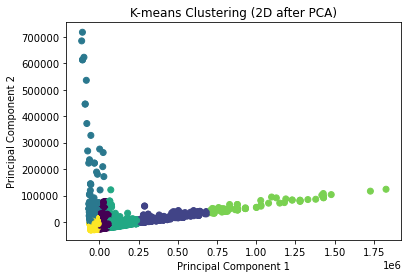

In [47]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'df' contains your data features

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Choose the number of components for visualization
df_2d = pca.fit_transform(df)

# Initialize the KMeans model
k = 6  # Choose the number of clusters (K)
kmeans = KMeans(n_clusters=k)

# Fit K-means to the reduced data
kmeans.fit(df_2d)

# Get cluster labels for the reduced data
cluster_labels = kmeans.labels_

# Plotting clusters in 2D after PCA
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('K-means Clustering (2D after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
